<a href="https://colab.research.google.com/github/Abitharani-Jeyachandran/Abitharani-Jeyachandran/blob/main/garbage_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.layers import Dense, Flatten
import cv2
import os

In [61]:
category = ["metal", "glass"]
EPOCHS = 50
IMGSIZE = 100 # 24, 48, 75, 50
BATCH_SIZE = 32
STOPPING_PATIENCE = 15
VERBOSE = 1
#MODEL_NAME = 'cnn_50epochs_imgsize128'
OPTIMIZER = 'adam'
DATASET_DIR = '/content/drive/MyDrive/Colab Notebooks/garbage' #folder path where training datasets are stored
TEST_DIR = '/content/drive/MyDrive/Colab Notebooks/garbage/test'

In [69]:
# img_data_list = []
# for dataset in os.listdir(TRAINING_DIR):
#     img_list=os.listdir(TRAINING_DIR +'/'+ dataset)
#     print('Loaded the images of dataset-'+'{}\n'.format(dataset))
#     for img in img_list:
#         img_arr = cv2.imread(TRAINING_DIR +'/'+ dataset + '/' + img) 
#         img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY) #change the image in gray-scale 
#         img_arr_resize = cv2.resize(img_arr, (IMGSIZE, IMGSIZE)) #resize the image in 100 x 100 
#         img_data_list.append(img_arr_resize)

label_dict = {'metal': 0, 'glass': 1}
corrupted_imgs = 0

def create_train_data(data_path):
  global corrupted_imgs
  X = []
  y = []
  
  for cat in os.listdir(data_path):
    cat_path = os.path.join(data_path, cat)
    img_files = os.listdir(cat_path)
    for img in img_files:
        img_path = os.path.join(cat_path, img)
        try:
          img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
          img_arr = cv2.resize(img_arr, (IMGSIZE, IMGSIZE))
          img_arr = img_arr / 255.0
          label = label_dict[cat]
          X.append(img_arr)
          y.append(label)
        except:
          corrupted_imgs += 1
  X = np.array(X).reshape(-1, IMGSIZE, IMGSIZE, 1)
  y = np.array(y)
  return X, y

In [36]:
X, y = create_train_data('/content/drive/MyDrive/Colab Notebooks/garbage/train')
y = to_categorical(y, 2)
print(f"features shape {X.shape}.\nlabel shape {y.shape}.")
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)
train_gen = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = train_datagen.flow(X_test, y_test, batch_size=BATCH_SIZE)

features shape (3332, 100, 100, 1).
label shape (3332,).
features shape (3332, 100, 100, 1).
label shape (3332, 2).


In [42]:
model = Sequential()
 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
 
model.add(Dense(2, activation='sigmoid'))

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE) #checkpoints

Epoch 1/5
70/70 [==============================] - 37s 528ms/step - loss: 0.6907 - accuracy: 0.5511 - val_loss: 0.6876 - val_accuracy: 0.5590
Epoch 2/5
70/70 [==============================] - 34s 491ms/step - loss: 0.6861 - accuracy: 0.5516 - val_loss: 0.6748 - val_accuracy: 0.5608
Epoch 3/5
70/70 [==============================] - 34s 487ms/step - loss: 0.6647 - accuracy: 0.5867 - val_loss: 0.6532 - val_accuracy: 0.5842
Epoch 4/5
70/70 [==============================] - 36s 517ms/step - loss: 0.6487 - accuracy: 0.5948 - val_loss: 0.7648 - val_accuracy: 0.5878
Epoch 5/5
70/70 [==============================] - 35s 494ms/step - loss: 0.6544 - accuracy: 0.6074 - val_loss: 0.8098 - val_accuracy: 0.5653


In [54]:
history.history

{'loss': [0.6907228827476501,
  0.6860571503639221,
  0.664737343788147,
  0.6487086415290833,
  0.6543874144554138],
 'accuracy': [0.5511031150817871,
  0.5515533685684204,
  0.5866726636886597,
  0.5947771072387695,
  0.6073840856552124],
 'val_loss': [0.6875710487365723,
  0.674768328666687,
  0.6531795263290405,
  0.7647778987884521,
  0.8097741007804871],
 'val_accuracy': [0.5589559078216553,
  0.5607560873031616,
  0.5841584205627441,
  0.5877587795257568,
  0.5652565360069275]}

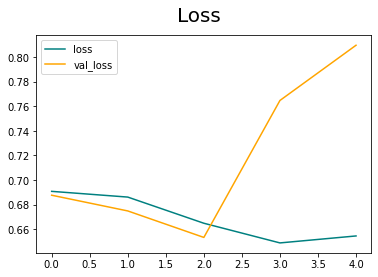

In [55]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

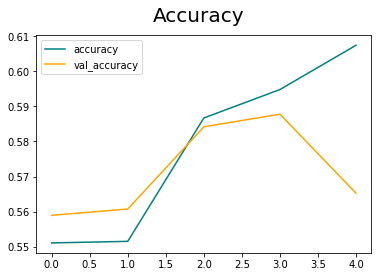

In [56]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [82]:
model.save_weights("model_weights.h5")
model.save('garbage-keras-model.h5')

In [58]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 64)       

In [59]:
train_acc = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE)
test_acc = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

35/35 [==============================] - 4s 109ms/step - loss: 0.8098 - accuracy: 0.5653


In [81]:
# for testing
im_test = []
corrupted_imgs = 0
for img in os.listdir(TEST_DIR):
    img_path = os.path.join(TEST_DIR, img)
    img_arr = cv2.imread(img_path) 
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY) #change the image in gray-scale
    img_arr_resize = cv2.resize(img_arr, (IMGSIZE, IMGSIZE)) #resize the image in 100 x 100 
 
    img_arr = img_arr_resize / 255.0

im_test.append(img_arr)
x = np.array(im_test).reshape(-1, IMGSIZE, IMGSIZE, 1)
y = model.predict(im_test)

ValueError: ignored

In [71]:
for i in range(len(im_pred)):
    print(im_pred[i].max())
    print(category[im_pred[i].argmax()])

0.6791282
glass
0.7728281
glass
0.8509697
glass
0.5891695
glass
0.7515679
glass
0.73973113
glass
0.823025
glass
0.8521764
glass
0.85549027
glass
0.81527454
glass
0.8521764
glass
0.749636
glass
0.8494536
glass
0.85549027
glass
0.8591024
glass
0.7672087
glass
0.59093106
glass
0.8601711
glass
0.85188395
glass
0.8250623
glass
0.8581056
glass
0.8499658
glass
0.85865724
glass
0.85320365
glass
0.8563166
glass
0.85964453
glass
0.85843325
glass
0.8538892
glass
0.85685307
glass
0.85627836
glass
0.8456751
glass
0.859494
glass
0.8518676
glass
0.8457759
glass
0.8585788
glass
0.7498711
glass
0.6962618
glass
0.82665455
glass
0.8486334
glass
0.7979174
glass
0.6562251
glass
0.8104699
glass
0.75004596
glass
0.85672987
glass
0.66020435
glass
0.8575239
glass
0.68836826
glass
0.8106857
glass
0.85734326
glass
0.85058993
glass
0.71766174
glass
